<a href="https://colab.research.google.com/github/Jotajtrader/Trading-Algoritmico/blob/main/Preparacion_de_los_datos_(RSI_%2B_WF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Preparacion de los datos**

Importamos las librerias necesarias para hacer el chequeo de la data y preprocesamiento

In [484]:
!pip install mplfinance

In [485]:
import pandas as pd
import numpy as np

Importamos la data y la mostramos en pantalla

In [486]:
data = pd.read_csv("/content/BITCOIN10080.csv")
data

,2010.07.12,10:00,0.05,0.05.1,0.05.2,0.05.3,1
0,2010.07.18,00:00,0.09,0.09,0.08,0.08,3
1,2010.07.19,10:00,0.05,0.06,0.05,0.05,9
2,2010.07.25,00:00,0.05,0.06,0.05,0.06,2
3,2010.08.01,00:00,0.06,0.06,0.06,0.06,1
4,2010.08.08,00:00,0.06,0.07,0.06,0.07,2
...,...,...,...,...,...,...,...
726,2024.03.17,00:00,68168.15,68992.76,60787.73,66544.03,2562957
727,2024.03.24,00:00,66584.51,71813.14,66388.80,70885.96,1819562
728,2024.03.31,00:00,70879.86,71435.46,64451.72,69277.25,1633910
729,2024.04.07,00:00,69277.23,72834.42,59935.31,63790.89,1784695


Como podemos observar el dataframe tiene como nombre de columnas la primera fila de los datos, con lo cual podemos tomar 2 decisiones:


*   Eliminar el dato
*   Insertar el dato al dataframe y renombrar las columnas

Por facilidad me inclinare por eliminar ese dato y simplemente renombrar la columna


In [487]:
data.columns = ["date","time","open","high","low","close","volume"]
data

,date,time,open,high,low,close,volume
0,2010.07.18,00:00,0.09,0.09,0.08,0.08,3
1,2010.07.19,10:00,0.05,0.06,0.05,0.05,9
2,2010.07.25,00:00,0.05,0.06,0.05,0.06,2
3,2010.08.01,00:00,0.06,0.06,0.06,0.06,1
4,2010.08.08,00:00,0.06,0.07,0.06,0.07,2
...,...,...,...,...,...,...,...
726,2024.03.17,00:00,68168.15,68992.76,60787.73,66544.03,2562957
727,2024.03.24,00:00,66584.51,71813.14,66388.80,70885.96,1819562
728,2024.03.31,00:00,70879.86,71435.46,64451.72,69277.25,1633910
729,2024.04.07,00:00,69277.23,72834.42,59935.31,63790.89,1784695


Ahora que tenemos una mejor estructura revisaremos los tipos de datos del dataframe

In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    731 non-null    object 
 1   time    731 non-null    object 
 2   open    731 non-null    float64
 3   high    731 non-null    float64
 4   low     731 non-null    float64
 5   close   731 non-null    float64
 6   volume  731 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 40.1+ KB


Observamos que las columnas date y time son de tipo string con lo cual tendremos que hacer algo.

Pero como en este caso haremos una estrategia de swingtrading que solo hara uso de la accion del precio, podemos eliminar la columna time que hace referencia a la hora y la columna volumen.

In [489]:
data.drop(["time","volume"],axis = 1, inplace = True)
data

,date,open,high,low,close
0,2010.07.18,0.09,0.09,0.08,0.08
1,2010.07.19,0.05,0.06,0.05,0.05
2,2010.07.25,0.05,0.06,0.05,0.06
3,2010.08.01,0.06,0.06,0.06,0.06
4,2010.08.08,0.06,0.07,0.06,0.07
...,...,...,...,...,...
726,2024.03.17,68168.15,68992.76,60787.73,66544.03
727,2024.03.24,66584.51,71813.14,66388.80,70885.96
728,2024.03.31,70879.86,71435.46,64451.72,69277.25
729,2024.04.07,69277.23,72834.42,59935.31,63790.89


Ahora la columna date la transformaremos a formato de fecha y la colocaremos como indice

In [490]:
# Primero reemplazamos los puntos de la fecha por guiones
data["date"] = data["date"].str.replace(".","-")
data

,date,open,high,low,close
0,2010-07-18,0.09,0.09,0.08,0.08
1,2010-07-19,0.05,0.06,0.05,0.05
2,2010-07-25,0.05,0.06,0.05,0.06
3,2010-08-01,0.06,0.06,0.06,0.06
4,2010-08-08,0.06,0.07,0.06,0.07
...,...,...,...,...,...
726,2024-03-17,68168.15,68992.76,60787.73,66544.03
727,2024-03-24,66584.51,71813.14,66388.80,70885.96
728,2024-03-31,70879.86,71435.46,64451.72,69277.25
729,2024-04-07,69277.23,72834.42,59935.31,63790.89


In [491]:
# Asignamos a la columna date un dataframe con datos tipo datetime
data["date"] = pd.to_datetime(data["date"] , format = "%Y-%m-%d")

# Seteamos la columna date como indice
data.set_index("date" , inplace = True)

# Mostramos de nuevo en pantalla
print(data)
data.info()

                open      high       low     close
date                                              
2010-07-18      0.09      0.09      0.08      0.08
2010-07-19      0.05      0.06      0.05      0.05
2010-07-25      0.05      0.06      0.05      0.06
2010-08-01      0.06      0.06      0.06      0.06
2010-08-08      0.06      0.07      0.06      0.07
...              ...       ...       ...       ...
2024-03-17  68168.15  68992.76  60787.73  66544.03
2024-03-24  66584.51  71813.14  66388.80  70885.96
2024-03-31  70879.86  71435.46  64451.72  69277.25
2024-04-07  69277.23  72834.42  59935.31  63790.89
2024-04-14  63782.39  66802.71  61485.43  61758.32

[731 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2010-07-18 to 2024-04-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    731 non-null    float64
 1   high    731 non-null    float64
 2   low     731 non-null    float64
 3   

Ahora podemos observar que todo lo que vimos a simple vista ha sido corregido, ahora veremos si tiene valores NA.

In [492]:
# Creamos un dataframe que indique True cuando los valores sean NA y False cuando no lo sean

data_nulls = data.isnull()

# Sumamos todas las filas
data_nulls.sum(axis = 0)

open     0
high     0
low      0
close    0
dtype: int64

## Analisis de los Datos

Podemos observar que no tenemos valores faltantes, con esto damos por finalizado la primera etapa del arreglo de los datos. Ahora comenzaremos a evaluar la consistencia de los datos:

*   Revisar Outliers
*   Continuidad de los datos
*   Datos Duplicados







El primer paso para revisar los outliers de las variables OHLC sera ver una descripcion general de las mismas

In [493]:
data.describe()

,open,high,low,close
count,731.000000,731.000000,731.000000,731.000000
mean,10836.105622,11585.661300,10087.921040,10908.741819
std,16210.070337,17299.027382,15089.102521,16317.289060
min,0.050000,0.060000,0.030000,0.050000
25%,148.085000,202.440000,138.275000,161.515000
50%,1236.310000,1268.160000,1172.750000,1250.620000
75%,14069.375000,16618.660000,12988.530000,15576.625000
max,70879.860000,73836.630000,66388.800000,70885.960000


Podemos observar que el valor maximo de los datos esta bastante alejado de la media, generaremos un grafico de caja para ver mas detallada esta situacion

Importamos las librerias necesarias para hacer los graficos

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

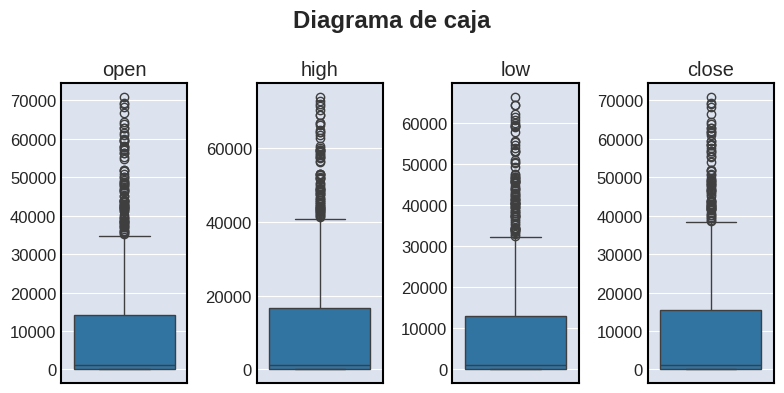

In [495]:
columnas = ["open","high","low","close"]

# Definimos la figura y las subfiguras
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (8,4))

# Creamos un bucle para crear el boxplot para todas las varibles
for i in range(len(columnas)):
  # Creamos el grafico
  sns.boxplot(data[columnas[i]], ax = ax[i])

  # Seteamos el titulo de los ejes
  ax[i].set_ylabel("")

  # Seteamos el titulo de cada subgrafico
  ax[i].set_title(columnas[i])

  # Setaamos el titulo de la figura
  fig.suptitle("Diagrama de caja")

# Ajustamos espaciado entre subgráficos
plt.tight_layout()

plt.show()

A pesar de lo que habiamos visto previamente observamos que los valores por encima de 5000 o valores cercanos a 1000 no corresponden a outliers

Ahora verificamos si tenemos valores duplicados

In [496]:
duplicados = data.duplicated()

duplicados.sum()

12

Con esto solo nos faltaria verificar si los datos son continuos, primero haremos una prueba visual graficando los datos

In [497]:
import mplfinance as mpf

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


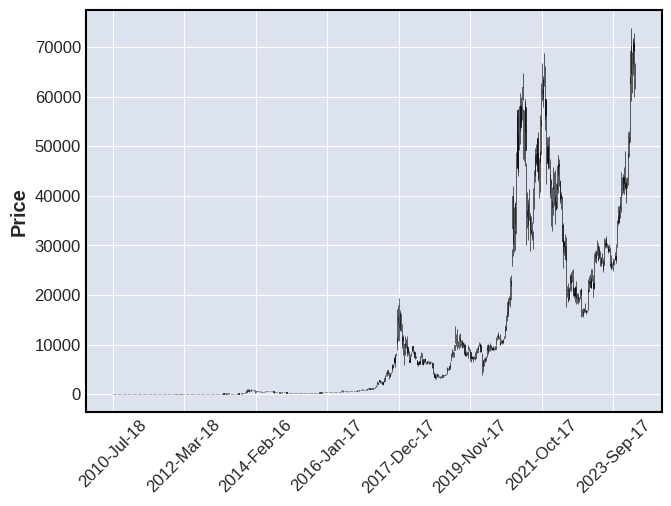

In [498]:
mpf.plot(data,type = "candle")

Aparentemente la data se ve continua sin embargo no lo tomaremos como conclusion final.

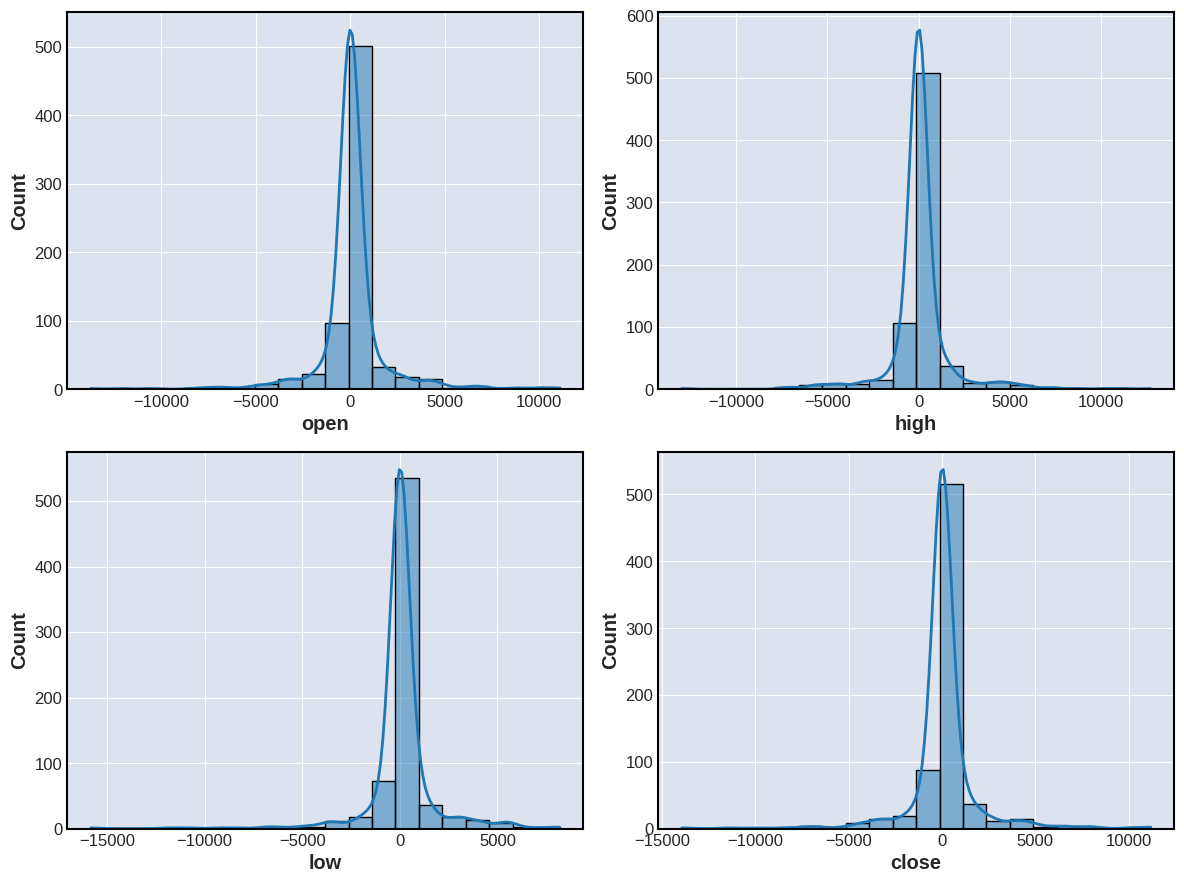

In [499]:
diferencias = data.diff()

nrows = 2
ncols = 2

fix,ax = plt.subplots(nrows = nrows, ncols = ncols , figsize = (12,9))

sns.histplot(diferencias[columnas[0]], ax = ax[0][0] , bins = 20, kde = True)
sns.histplot(diferencias[columnas[1]], ax = ax[0][1] , bins = 20, kde = True)
sns.histplot(diferencias[columnas[2]], ax = ax[1][0] , bins = 20, kde = True)
sns.histplot(diferencias[columnas[3]], ax = ax[1][1] , bins = 20, kde = True)


# Ajustamos espaciado entre subgráficos
plt.tight_layout()

plt.show()

Podemos observa como la concentracion de datos gira entorno a la zona central

In [500]:
diferencias.describe()

,open,high,low,close
count,730.000000,730.000000,730.000000,730.000000
mean,87.373014,91.510438,84.226507,84.600329
std,1845.775433,1722.647392,1708.629415,1813.999838
min,-13733.890000,-12962.930000,-15827.730000,-13934.790000
25%,-32.660000,-46.330000,-26.860000,-34.210000
50%,0.235000,0.000000,0.760000,0.245000
75%,137.735000,118.802500,148.067500,138.247500
max,11088.600000,12693.190000,8184.050000,11167.880000



Podemos decir de esta descripcion que:

*   La mediana esta ligeramente inclinada hacia la derecha
*   El promedio esta por encima de la mediana
*   El 75% de los valores no supera una variacion de 12,5 puntos

In [ ]:
# Definimos la figura y las subfiguras
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (12,8))

# Creamos un bucle para crear el boxplot para todas las varibles
for i in range(len(columnas)):
  # Creamos el grafico
  sns.boxplot(diferencias[columnas[i]], ax = ax[i])

  # Seteamos el titulo de los ejes
  ax[i].set_ylabel("")

  # Seteamos el titulo de cada subgrafico
  ax[i].set_title(columnas[i])

  # Setaamos el titulo de la figura
  fig.suptitle("Diagrama de caja")

# Ajustamos espaciado entre subgráficos
plt.tight_layout()

plt.show()

Tenemos bastantes valores Outliers, sin embargo entre graficas podemos observar una simetria en esta situacion. Por lo que podria estos estarse debiendo a eventos que aumenten la volatilidad. A partir de estos graficos no podemos concluir que los datos no sean consistentes. Por lo tanto asumiremos que lo son.

### **Indicadores a usar**

La estrategia que construiremos tendra de uso dos indicadores, los cuales son:

*   Williams Fractal
*   RSI

Nota_1: El RSI lo importaremos de la libreria Ta

Nota_2: El Williams Fractal tendremos que construirlo

Comencemos por reimprimir el set de datos

In [ ]:
data

Crearemos una funcion que me permita calcular el william fractal

In [ ]:
def william_fractal (dataframe,periodos = 2):

  # Cremos una copia del dataframe original
  copia_df = dataframe.copy()

  # Creamos la serie de booleanos que nos dira cuando es un up o un downfractal
  up_fractal_condition =((copia_df["high"].shift(periodos) > copia_df["high"].shift(periodos - 1)) &
                         (copia_df["high"].shift(periodos) > copia_df["high"])                     &
                         (copia_df["high"].shift(periodos) >= copia_df["high"].shift(periodos + 1))&
                         (copia_df["high"].shift(periodos) >= copia_df["high"].shift(periodos + 2)))

  down_fractal_condition =((copia_df["low"].shift(periodos) < copia_df["low"].shift(periodos - 1)) &
                           (copia_df["low"].shift(periodos) < copia_df["low"])                     &
                           (copia_df["low"].shift(periodos) <= copia_df["low"].shift(periodos + 1))&
                           (copia_df["low"].shift(periodos) <= copia_df["low"].shift(periodos + 2)))

  # Insertamos esta serie en la copia del dataframe

  copia_df["up_fractal"] = up_fractal_condition#(periodos*-1)
  copia_df["down_fractal"] = down_fractal_condition#(periodos*-1)

  # Obtenemos los precios correspondientes a los william Fractal

  copia_df["up_fractal_price"] = np.nan
  copia_df["down_fractal_price"] = np.nan
  copia_df.loc[copia_df["up_fractal"],"up_fractal_price"] = copia_df["high"].shift(2)
  copia_df.loc[copia_df["down_fractal"],"down_fractal_price"] = copia_df["low"].shift(2)

  return copia_df

Queremos graficar los williams fractal para ver si estan correctos, para ahora que sabemos donde se ubica. Necesitamos el precio del mismo

In [ ]:
data_william_fractal = william_fractal(data)
data_william_fractal

Ahora pasaremos a plotear el precio con los williams fractals para hacer una comprobacion visual de lo que esta sucediendo

In [ ]:
# Creamos una distancia para alejarla del precio donde se ubica el william fractal para mejor visualizacion
distancia_precio = 20

# Filtramos poor fecha de modo de poder observar el patron
filtro_fecha_inicio = "2023-07"
filtro_fecha_fin    = "2023-12"

# Creamos una lista con todos los indicadores que querramos sumar al grafico
wf = [mpf.make_addplot(data_william_fractal["up_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2)+ distancia_precio,  type = "scatter",markersize=100,marker='^',color = "green"),
      mpf.make_addplot(data_william_fractal["down_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2) - distancia_precio,  type = "scatter",markersize=100,marker='v',color ="red")
      ]
# Ploteamos
mpf.plot(data.loc[filtro_fecha_inicio:filtro_fecha_fin],type ="candle",addplot = wf)

Luego de hacer una comprobacion visual podemos dar por listo la creacion de este indicador. Ahora agregaremos el indicador RSI al dataframe, comenzaremos por instalar la libreria ta

In [ ]:
!pip install ta

In [ ]:
import ta

In [ ]:
from ta.momentum import RSIIndicator

Creamos una funcion que me permita hacer el calculo del RSI

In [ ]:
def RSI(dataframe,periodos = 14):

  # Creamos el indicador
  indicador_rsi = RSIIndicator(dataframe["close"],window = periodos)

  # Creamos una copia del dataframe anterior
  data_wf_rsi = dataframe.copy()

  # Agregamos al dataframe el RSI
  data_wf_rsi["rsi_" + str(periodos)] = indicador_rsi.rsi()

  return data_wf_rsi

In [ ]:
df_estrategia = RSI(data_william_fractal)
df_estrategia

Ahora que tenemos el indicador procederemos a hacer una comprobacion visual del indicador

In [ ]:
# Creamos una distancia para alejarla del precio donde se ubica el william fractal para mejor visualizacion
periodos = 14
distancia_precio = 20

# Creamos los niveles de sobrecompra, sobreventa y valor medio
sobre_compra = pd.DataFrame(df_estrategia.index).set_index("date")
sobre_venta  = pd.DataFrame(df_estrategia.index).set_index("date")
valor_medio  = pd.DataFrame(df_estrategia.index).set_index("date")

sobre_compra["sobre_compra"]  = 70
sobre_venta ["sobre_venta"]   = 30
valor_medio ["valor_medio"]   = 50

# Filtramos poor fecha de modo de poder observar el patron
filtro_fecha_inicio = "2023-07"
filtro_fecha_fin    = "2023-12"

# Creamos una lista con todos los indicadores que querramos sumar al grafico
wf = [mpf.make_addplot(df_estrategia["up_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2)+ distancia_precio,  type = "scatter",markersize=100,marker='^',color = "green"),
      mpf.make_addplot(df_estrategia["down_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2) - distancia_precio,  type = "scatter",markersize=100,marker='v',color ="red"),
      mpf.make_addplot(df_estrategia["rsi_" + str(periodos)].loc[filtro_fecha_inicio:filtro_fecha_fin], panel = 1, color ="purple"),
      mpf.make_addplot(sobre_compra.loc[filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted'),
      mpf.make_addplot(valor_medio.loc [filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted'),
      mpf.make_addplot(sobre_venta.loc [filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted')
      ]
# Ploteamos
mpf.plot(data.loc[filtro_fecha_inicio:filtro_fecha_fin],type ="candle",addplot = wf)


## Creacion de la Estrategia

Con esto verificado ya tenemos todo lo necesario para crear la estrategia, lo cual se descompone en varios pasos:

*   Creacion de la columna Stop Loss
*   Creacion de la Columna Señal
*   Creacion de la columna retorno
*   Creacion de la columna RSI yesterday

Nota: Todo lo refente a metricas de la curva de capital lo haremos en un siguiente apartado.


Comenzaremos por reimprimir el dataframe para tenerlo a la vista

In [ ]:
df_estrategia.head(20)

Crearemos la columna que nos indicara donde se ubicaria el stop loss

In [ ]:
# Hacemos una copia de dataframe
df_estrategia_final = df_estrategia.copy()

#Creamos el RSI yesterday
#df_estrategia_final["rsi_yesterday"] = df_estrategia_final["rsi_" + str(periodos)].shift()
df_estrategia_final["close_yesterday"] = df_estrategia_final["close"].shift()

df_estrategia_final.head(20)

In [ ]:
# Agregamos la columna stop loss
df_estrategia_final["stop_loss_venta"] = df_estrategia_final["up_fractal_price"].fillna(method = "ffill")
df_estrategia_final["stop_loss_compra"] = df_estrategia_final["down_fractal_price"].fillna(method = "ffill")

# Creamos la condition de compra y venta y condicion de stop loss

condicion_compra = ((df_estrategia_final["close_yesterday"] < df_estrategia_final["stop_loss_venta"]) &
                    (df_estrategia_final["rsi_" + str(periodos)] > 50) &
                    (df_estrategia_final["close"] > df_estrategia_final["stop_loss_venta"]))

condicion_venta  = ((df_estrategia_final["close_yesterday"] > df_estrategia_final["stop_loss_compra"]) &
                    (df_estrategia_final["rsi_" + str(periodos)] < 50) &
                    (df_estrategia_final["close"] < df_estrategia_final["stop_loss_compra"]))

condicion_SL_compra = ((df_estrategia_final["close_yesterday"] >  df_estrategia_final["stop_loss_compra"])&
                       (df_estrategia_final["close"] < df_estrategia_final["stop_loss_compra"]))

condicion_SL_venta = ((df_estrategia_final["close_yesterday"] <  df_estrategia_final["stop_loss_venta"])&
                       (df_estrategia_final["close"] > df_estrategia_final["stop_loss_venta"]))

# señal de compra y venta para el grafico

df_estrategia_final["señal_compra"] = np.nan
df_estrategia_final["señal_venta"] = np.nan

df_estrategia_final.loc[condicion_compra,"señal_compra"] = 1
df_estrategia_final.loc[condicion_venta,"señal_venta"]  = -1

# señal de stop_loss

comprado,vendido = False,False
stop_loss = []

for index,row in df_estrategia_final.iterrows():

  if row["señal_compra"] == 1:
    comprado = True
  elif row["señal_venta"] == -1:
    vendido = True

  if (comprado & condicion_SL_compra[index]):
    stop_loss.append(index)
    comprado = False

  elif(vendido & condicion_SL_venta[index]):
    stop_loss.append(index)
    vendido = False

  else:
    stop_loss.append(np.NaN)

df_estrategia_final["stop_loss"] = np.where(np.array(stop_loss) == df_estrategia_final.index,0,np.NaN)


# Armado de la Señal
df_estrategia_final["signal"] = np.where(condicion_compra,1,np.where(condicion_venta,-1,np.where(df_estrategia_final["stop_loss"],np.NaN,0)))
df_estrategia_final["signal"] = df_estrategia_final["signal"].fillna(method = "ffill")

pd.options.display.max_rows = 150

df_estrategia_final["2019-12":"2020-03"].head(150)

Generaremos un grafico para ver si tenemos las señales correctas

In [ ]:
# Creamos una distancia para alejarla del precio donde se ubica el william fractal para mejor visualizacion
periodos = 14
distancia_precio = 20
distancia_precio_signal = 100

# Creamos los niveles de sobrecompra, sobreventa y valor medio
sobre_compra = pd.DataFrame(df_estrategia_final.index).set_index("date")
sobre_venta  = pd.DataFrame(df_estrategia_final.index).set_index("date")
valor_medio  = pd.DataFrame(df_estrategia_final.index).set_index("date")

sobre_compra["sobre_compra"]  = 70
sobre_venta ["sobre_venta"]   = 30
valor_medio ["valor_medio"]   = 50

# Filtramos poor fecha de modo de poder observar el patron
filtro_fecha_inicio = "2019-12"
filtro_fecha_fin    = "2020-03"

# Buscamos el indice del signal

indice_signal_compra = df_estrategia_final[df_estrategia_final["signal"] == 1].index
indice_signal_venta = df_estrategia_final[df_estrategia_final["signal"] == -1].index

# Creamos una lista con todos los indicadores que querramos sumar al grafico
wf = [mpf.make_addplot(df_estrategia_final["up_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2)+ distancia_precio,  type = "scatter",markersize=100,marker='^',color = "green"),
      mpf.make_addplot(df_estrategia_final["down_fractal_price"].loc[filtro_fecha_inicio:filtro_fecha_fin].shift(-2) - distancia_precio,  type = "scatter",markersize=100,marker='v',color ="red"),
      mpf.make_addplot(df_estrategia_final["rsi_" + str(periodos)].loc[filtro_fecha_inicio:filtro_fecha_fin], panel = 1, color ="purple"),
      #mpf.make_addplot(sobre_compra.loc[filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted')]
      #mpf.make_addplot(valor_medio.loc [filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted'),
      #mpf.make_addplot(sobre_venta.loc [filtro_fecha_inicio:filtro_fecha_fin] ,panel = 1, color ="gray",linestyle='dotted')]

      mpf.make_addplot(df_estrategia_final["señal_compra"].loc[filtro_fecha_inicio:filtro_fecha_fin] * df_estrategia_final["low"].loc[filtro_fecha_inicio:filtro_fecha_fin]  - distancia_precio_signal,  type = "scatter",markersize=50,marker='^',color = "black"),
      mpf.make_addplot(df_estrategia_final["señal_venta"].loc[filtro_fecha_inicio:filtro_fecha_fin] * df_estrategia_final["high"].loc[filtro_fecha_inicio:filtro_fecha_fin]*-1  + distancia_precio_signal,  type = "scatter",markersize=50,marker='v',color = "black"),
      mpf.make_addplot(df_estrategia_final["stop_loss"].loc[filtro_fecha_inicio:filtro_fecha_fin] + df_estrategia_final["high"].loc[filtro_fecha_inicio:filtro_fecha_fin]  + distancia_precio_signal,  type = "scatter",markersize=50,marker='|',color = "black")
      ]
# Ploteamos
mpf.plot(data.loc[filtro_fecha_inicio:filtro_fecha_fin],type ="candle",addplot = wf,figsize = (20,10))

Ya corroborado la columna de signal ahora agregamos la columna de retornos diarios al dataframe y asi poder calcular las ganancias

In [ ]:
#Calculamos la variacion porcentual diaria

df_estrategia_final["pct_change"] = df_estrategia_final["close"].pct_change()

#Las ganancias de hoy es en funcion de la entrada de ayer
df_estrategia_final["returns"] = df_estrategia_final["pct_change"] * df_estrategia_final["signal"].shift()

#Observamos el dataframe para ve si todo esta correcto
df_estrategia_final[["signal","pct_change","returns"]].loc["2020":].head(100)

Hacemos un grafico rapido de los retornos acumulados

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_estrategia_final["returns"].cumsum())

plt.show()

Aunque tenemos que la estrategia no funciona correctamente en este activo, no podemos descartar el hecho de que esta estrategia no pueda funcionar en otros. Con lo cual esto nos invita a buscar mas data de otros activos, armar una funcion que nos permita correr esta estrategia en distintos activos y generar un dataframe con todos los resultados de la estrategia y observar que nos puede llegar a servir.

## **Backtesting**

In [ ]:
def beta_function(serie):

  # Get SP500 data
  sp500 = data["close"].pct_change(1)

  # Change column name
  sp500.columns = ["SP500"]

  # Concatenate
  g = pd.concat((serie,sp500), axis=1)

  # Compute the beta
  beta = np.cov(g[[serie.name, "SP500"]].dropna().values,rowvar=False)[0][1] / np.var(g["SP500"].dropna().values)

  return beta


In [ ]:
def drawdown_function(serie):

  # Calculamos la suma de los rendimientos
  cum = serie.dropna().cumsum() + 1

  # Calculamos el máximo de la suma en el período (máximo acumulado) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # Calculamos el drawdown
  drawdown = cum/running_max - 1

  return drawdown


In [ ]:
def BackTest(serie, annualiazed_scalar=252):
    # Importar el benchmark
    sp500 = data["close"].pct_change(1)

    # Cambiar el nombre
    sp500.name = "SP500"

    # Concatenar los retornos y el sp500
    val = pd.concat((serie, sp500), axis=1).dropna()
    # Calcular el drawdown
    drawdown = drawdown_function(serie) * 100

    # Calcular el max drawdown
    max_drawdown = -np.min(drawdown)

    # Put a subplots
    fig, (cum, dra) = plt.subplots(1, 2, figsize=(20, 6))

    # Put a Suptitle
    fig.suptitle("Backtesting", size=20)

    # Returns cumsum chart
    cum.plot(serie.cumsum() * 100, color="#39B3C7")

    # SP500 cumsum chart
    cum.plot(val["SP500"].cumsum() * 100, color="#B85A0F")

    # Put a legend
    cum.legend(["Portfolio", "Buy & Hold"])

    # Set individual title
    cum.set_title("Cumulative Return", size=13)

    cum.set_ylabel("Cumulative Return %", size=11)

    # Put the drawdown
    dra.fill_between(drawdown.index, 0, drawdown, color="#C73954", alpha=0.65)

    # Set individual title
    dra.set_title("Drawdown", size=13)

    dra.set_ylabel("drawdown en %", size=11)

    # Plot the graph
    plt.show()

    # Calcular el índice sortino
    sortino = np.sqrt(annualiazed_scalar) * serie.mean() / serie.loc[serie < 0].std()

    # Calcular el índice  beta
    beta = np.cov(val[["returns", "SP500"]].values, rowvar=False)[0][1] / np.var(val["SP500"].values)

    # Calcular el índice  alpha
    alpha = annualiazed_scalar * (serie.mean() - beta * serie.mean())

    # Imprimir los estadísticos
    print(f"Sortino: {np.round(sortino, 3)}")
    print(f"Beta: {np.round(beta, 3)}")
    print(f"Alpha: {np.round(alpha * 100, 3)} %")
    print(f"MaxDrawdown: {np.round(max_drawdown, 3)} %")

In [ ]:
back_test = BackTest(df_estrategia_final["returns"])

## **Optimizacion de Parametros**